# Self-packing Densities
Update for Master Plan 2029

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Define the packing model function
def pack(x, k1, k2):
    y = 1/((x/k1)+((1-x)/k2))
    return y


In [4]:
# read in CRMS data
with open('Site mean OM_BD by year.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data)

0.0630761906752043
2.2726741414897353


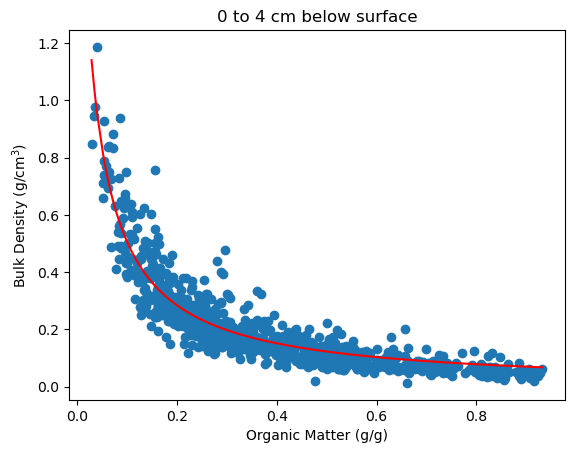

0.07446460429723367
1.9130298269658057


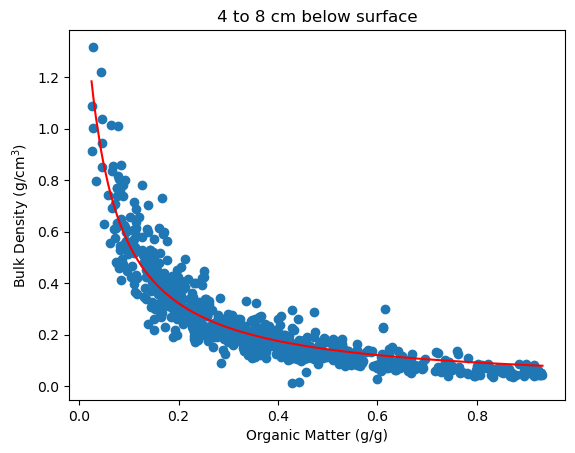

0.07694046487855913
2.1345624267764176


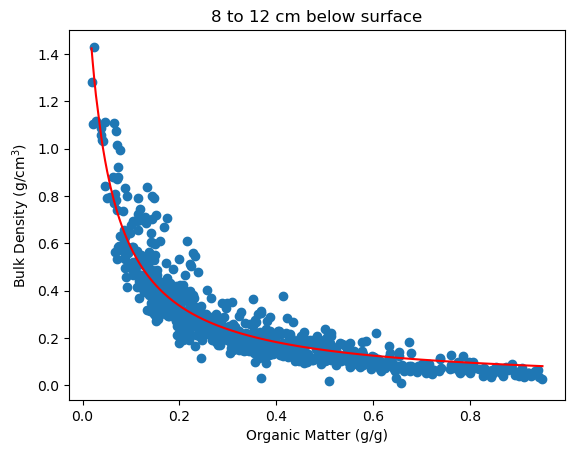

0.0791349278007289
2.0969964691041763


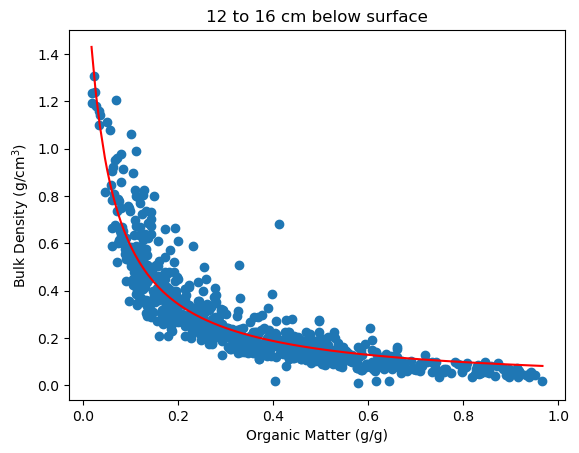

0.08119341556790469
2.164360823625209


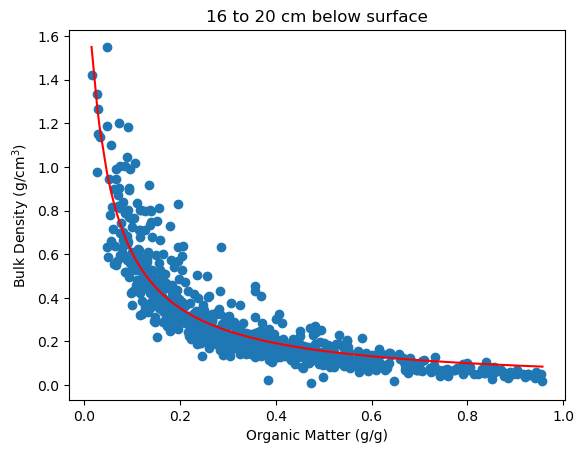

0.08069043857785488
2.4566950583124627


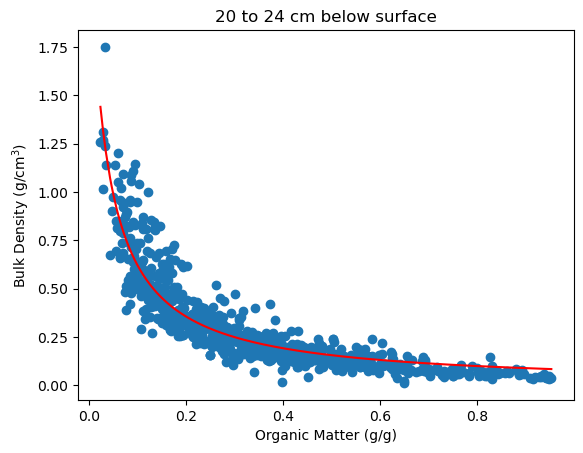

In [5]:
#extract OM and BD data by layer

#layer strings
layers = ["0 to 4","4 to 8","8 to 12", "12 to 16", "16 to 20", "20 to 24"]

k1_all = []
k2_all = []

for layer in layers:
    BD_layer = []
    OM_layer = []
    for l in data_array:
        if l[5] == layer:
            if l[7] and l[8] != "": #exclude empty cells
                BD_layer.append(l[7])
                OM_layer.append(l[8])
        
    BD_layer = np.array(BD_layer, dtype = float)
    OM_layer = np.array(OM_layer, dtype = float)
    OM_layer = OM_layer/100 #spreadsheet has OM as %
    
    k, covariance = curve_fit(pack, OM_layer, BD_layer)
    k1 = k[0]
    k2 = k[1]
    print(k1)
    print(k2)
    k1_all.append(k1)
    k2_all.append(k2)
    x_fit = np.sort(OM_layer)
    y_fit = 1/((x_fit/k1)+((1-x_fit)/k2))
    
    plt.plot(OM_layer, BD_layer, 'o')
    plt.plot(x_fit, y_fit,'r')
    plt.xlabel('Organic Matter (g/g)')
    plt.ylabel('Bulk Density (g/cm$^3$)')
    plt.title(layer + ' cm below surface')
    plt.show()
    


[0.0630761906752043, 0.07446460429723367, 0.07694046487855913, 0.0791349278007289, 0.08119341556790469, 0.08069043857785488]
[2.2726741414897353, 1.9130298269658057, 2.1345624267764176, 2.0969964691041763, 2.164360823625209, 2.4566950583124627]
0.07591667363291427
0.006178250204604989
2.1730531243789675
0.16599744658640783


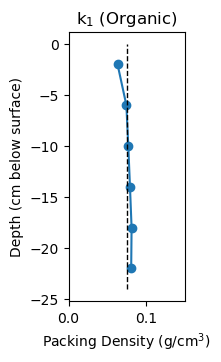

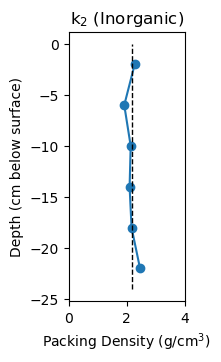

In [6]:
print(k1_all)
print(k2_all)

print(np.mean(k1_all))
print(np.std(k1_all))
print(np.mean(k2_all))
print(np.std(k2_all))

plt.plot(k1_all, [-2,-6,-10,-14,-18,-22],'o-')
plt.xlabel('Packing Density (g/cm$^3$)')
plt.ylabel('Depth (cm below surface)')
plt.title('k$_1$ (Organic)')
plt.xlim(0,0.15)
plt.vlines(np.mean(k1_all),-24,0,color='k', linestyle='--', lw=1)
fig = plt.gcf()
fig.set_size_inches(1.5, 3.5)
#fig.savefig('test2png.png', dpi=100)
plt.show()


plt.plot(k2_all, [-2,-6,-10,-14,-18,-22],'o-')
plt.xlabel('Packing Density (g/cm$^3$)')
plt.ylabel('Depth (cm below surface)')
plt.title('k$_2$ (Inorganic)')
plt.xlim(0,4)
plt.vlines(np.mean(k2_all),-24, 0,color='k', linestyle='--', lw=1)
fig = plt.gcf()
fig.set_size_inches(1.5, 3.5)
plt.show()